In [66]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import distributed_filter
import pandas as pd
import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
L = 950e-6
r = 1e-6*4
w = 1e-6
s = 1e-6
(
    ns, 
    ls, 
    Ws, 
    Hs, 
    As
) = distributed_filter.generate_series_resonator_params(L, r, r, w, s)

# Plotting Example: One Stage Filter

(-1.2803315572816616e-05,
 0.0002687928409334421,
 -7.281438892349013e-05,
 3.6153147275168715e-05)

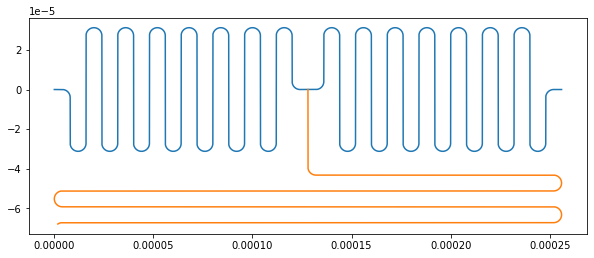

In [56]:
ind = 13
n, l, W, H, A = ns[ind], ls[ind], Ws[ind], Hs[ind], As[ind]
(
    x_series, 
    y_series, 
    x_shunt1, 
    y_shunt1, 
) = distributed_filter.one_stage_filter(
    origin_x=0, 
    origin_y=0, 
    n=n,
    L=L, 
    r=r, 
    l=l, 
    w=w, 
    s=w, 
    x_length=r, 
    shunt_padding=3, 
    n_points_meander=3600
)
plt.figure(figsize = (10,5))
plt.plot(x_series, y_series)
plt.plot(x_shunt1, y_shunt1)
plt.axis("scaled")

# Plotting Example: Two Stage Filter

(-2.3403315477613437e-05,
 0.0004033928389341678,
 -6.511257742236522e-05,
 6.511606960351378e-05)

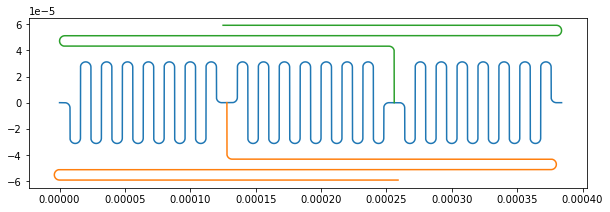

In [57]:
ind = 13
n, l, W, H, A = ns[ind], ls[ind], Ws[ind], Hs[ind], As[ind]

(
    x_series, 
    y_series, 
    x_shunt1, 
    y_shunt1, 
    x_shunt2, 
    y_shunt2
) = distributed_filter.two_stage_filter(
    origin_x=0, 
    origin_y=0, 
    n=n, 
    L=L, 
    r=r, 
    l=l, 
    w=w, 
    s=w, 
    x_length=r, 
    shunt_padding=3, 
    n_points_meander=3600
)
plt.figure(figsize = (10,5))
plt.plot(x_series, y_series)
plt.plot(x_shunt1, y_shunt1)
plt.plot(x_shunt2, y_shunt2)
plt.axis("scaled")

# Optimisation Example: One Stage Filter

In [68]:
# Set the main parameters
L = 950e-6
r = 1e-6*4
w = 1e-6
s = 1e-6


(
    ns, 
    ls, 
    Ws, 
    Hs, 
    As
) = distributed_filter.generate_series_resonator_params(
    L=L, 
    r=r, 
    x=r, 
    w=w, 
    s=s
)

headings = ["n_meanders", "length", "width", "height", "area"]
params = []
for n, l  in tqdm.tqdm(zip(ns, ls), total=len(ns)):
    (
        x_series, 
        y_series, 
        x_shunt1, 
        y_shunt1, 
    ) = distributed_filter.one_stage_filter(
        origin_x=0, 
        origin_y=0, 
        n=n,
        L=L, 
        r=r, 
        l=l, 
        w=w, 
        s=w, 
        x_length=r, 
        shunt_padding=3, 
        n_points_meander=3600
    )
    W_real = max(x_series)-min(x_series)
    H_real = max(y_shunt1)-min(y_series) + w + 2*s
    A = W_real*H_real
    
    params.append([n, l, W_real, H_real, A])
    
df = pd.DataFrame(params,columns = headings)

100%|██████████| 75/75 [00:08<00:00,  8.35it/s]


n_opt_square = 9


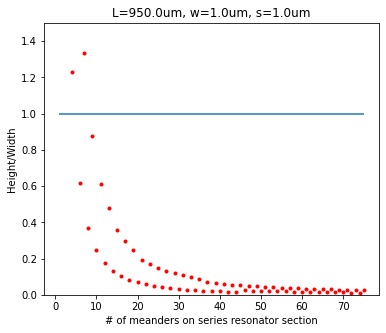

In [59]:
fig = plt.figure(figsize = (6, 5))
plt.plot(df.n_meanders, df.height/df.width, "r.")
plt.xlabel("# of meanders on series resonator section")
plt.ylabel("Height/Width")
plt.title(f"L={(L/1e-6):.1f}um, w={(w/1e-6):.1f}um, s={(s/1e-6):.1f}um")
plt.hlines(1, xmin=min(df.n_meanders), xmax=max(df.n_meanders))
plt.ylim([0, 1.5])
ind = np.argmin(abs(df.height/df.width - 1))
print(f"n_opt_square = {df.n_meanders[ind]}")

Text(0.5, 1.0, 'L=950.0um, w=1.0um, s=1.0um')

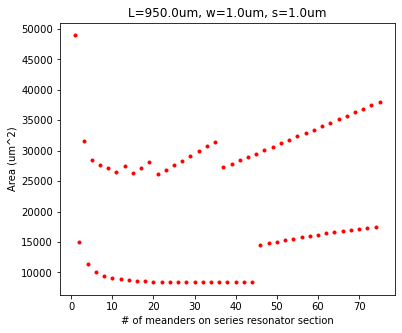

In [60]:
fig = plt.figure(figsize = (6, 5))
plt.plot(df.n_meanders, df.area/1e-12, "r.")
plt.xlabel("# of meanders on series resonator section")
plt.ylabel("Area (um^2)")
plt.title(f"L={(L/1e-6):.1f}um, w={(w/1e-6):.1f}um, s={(s/1e-6):.1f}um")

In [61]:
print(
    f"""
    n = {df.n_meanders[ind]}
    l = {(df.length[ind]/1e-6):.2f} um
    A = {((df.area/1e-12) [ind]):.2f} um^2
    H = {(df.height[ind]/1e-6):.2f} um
    W = {(df.width[ind]/1e-6):.2f} um
    Aspect_ratio = {(df.height[ind]/df.width[ind]):.2f}
    """
)


    n = 9
    l = 91.59 um
    A = 27207.27 um^2
    H = 154.59 um
    W = 175.99 um
    Aspect_ratio = 0.88
    


Text(0.5, 0, 'x (um)')

<Figure size 576x576 with 0 Axes>

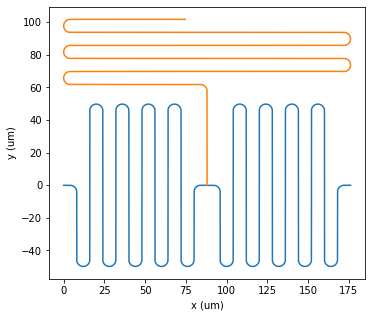

In [62]:
fig = plt.figure(figsize=(8,8))
n, l, W, H, A = ns[ind], ls[ind], Ws[ind], Hs[ind], As[ind]

(
    x_series, 
    y_series, 
    x_shunt1, 
    y_shunt1, 
) = distributed_filter.one_stage_filter(
    origin_x=0, 
    origin_y=0, 
    n=n, 
    L=L, 
    r=r, 
    l=l, 
    w=w, 
    s=w, 
    x_length=r, 
    shunt_padding=3, 
    n_points_meander=3600
)
plt.figure(figsize = (10,5))
plt.plot(x_series/1e-6, y_series/1e-6)
plt.plot(x_shunt1/1e-6, y_shunt1/1e-6)
plt.axis("scaled")
plt.ylabel("y (um)")
plt.xlabel("x (um)")